In [2]:
#Korzystając z danych boston, przeprowadź analogiczną analizę - wybierz trzy najbardziej skorelowane zmienne objaśniające z targetem, a następnie zbuduj na nich model regresji liniowej. 
#Sprawdź wyniki pomiaru błędu predykcji.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import datasets




In [6]:
data = datasets.load_boston()
# Zmienne objaśniające
df = pd.DataFrame(data.data, columns=data.feature_names)
# Zmienna objaśniana
target = pd.DataFrame(data.target, columns=["MEDV"])

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [10]:
df.shape

(506, 13)

In [11]:
df.columns.tolist()

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [12]:
target.shape

(506, 1)

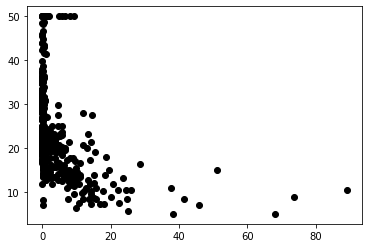

In [13]:
plt.scatter(df.CRIM, target,  color='black')

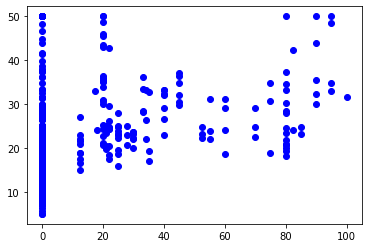

In [14]:
plt.scatter(df.ZN, target,  color='blue')

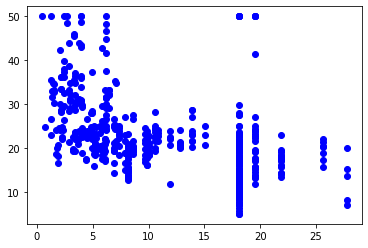

In [15]:
plt.scatter(df.INDUS, target,  color='blue')

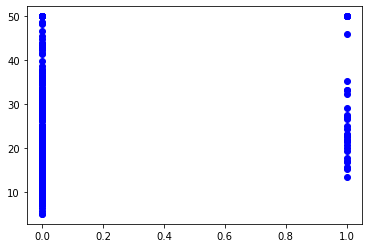

In [16]:
plt.scatter(df.CHAS, target,  color='blue')

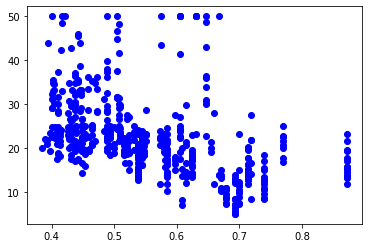

In [17]:
plt.scatter(df.NOX, target,  color='blue')

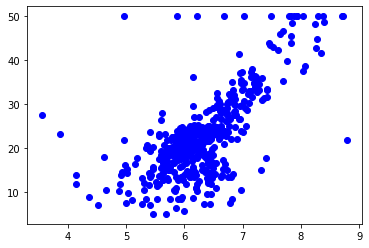

In [18]:
plt.scatter(df.RM, target,  color='blue')

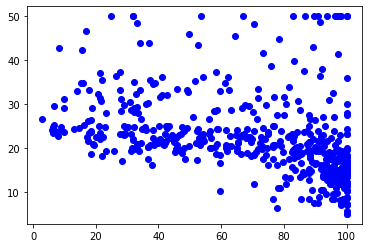

In [19]:
plt.scatter(df.AGE, target,  color='blue')

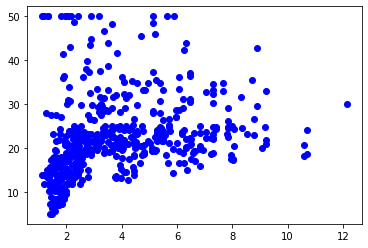

In [20]:
plt.scatter(df.DIS, target,  color='blue')

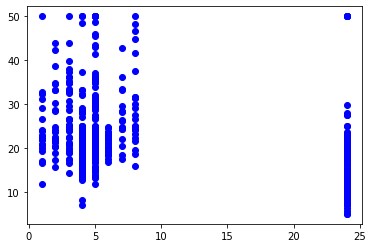

In [21]:
plt.scatter(df.RAD, target,  color='blue')

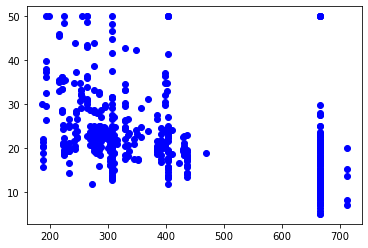

In [22]:
plt.scatter(df.TAX, target,  color='blue')

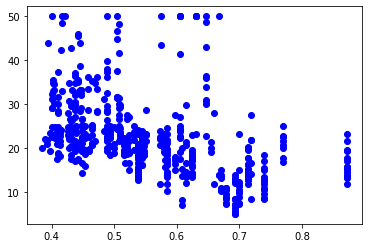

In [23]:
plt.scatter(df.NOX, target,  color='blue')

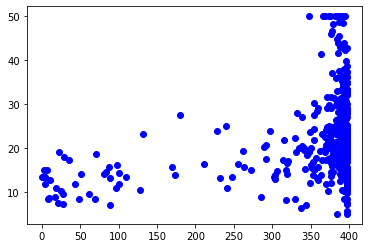

In [24]:
plt.scatter(df.B, target,  color='blue')

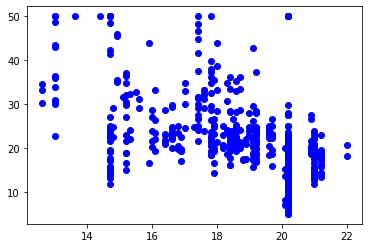

In [25]:
plt.scatter(df.PTRATIO, target,  color='blue')

In [39]:
df['Y']=target

In [40]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y(target),Y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,36.2


In [46]:
corr = df.corr() #korelacja
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y(target),Y
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.468536


In [47]:
df.drop('Y(target)')

KeyError: "['Y(target)'] not found in axis"

<AxesSubplot:>

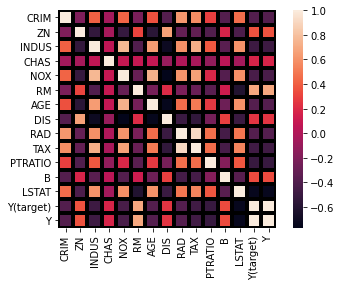

In [48]:
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns,linewidths = 3,linecolor='black',cbar= True,square = True)

In [37]:
dataset = df.iloc[:,:-1]

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['CRIM']], df.Y, test_size=0.2, random_state=0)

In [45]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y(target),Y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,36.2


In [50]:
modelCRIM = LinearRegression()
modelCRIM.fit(X_train, y_train)
modelCRIM.score(X_test, y_test)

0.06191568380189638

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['ZN']], df.Y, test_size=0.2, random_state=0)

In [52]:
modelZN = LinearRegression()
modelZN.fit(X_train, y_train)
modelZN.score(X_test, y_test)

-0.03969012242421832

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['INDUS']], df.Y, test_size=0.2, random_state=0)

In [54]:
modelINDUS = LinearRegression()
modelINDUS.fit(X_train, y_train)
modelINDUS.score(X_test, y_test)

0.054027642748776916

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['CHAS']], df.Y, test_size=0.2, random_state=0)

In [59]:
modelCHAS = LinearRegression()
modelCHAS.fit(X_train, y_train)
modelCHAS.score(X_test, y_test)

0.05495229223789311

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['NOX']], df.Y, test_size=0.2, random_state=0)

In [61]:
modelNOX = LinearRegression()
modelNOX.fit(X_train, y_train)
modelNOX.score(X_test, y_test)

0.05495229223789311

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['RM']], df.Y, test_size=0.2, random_state=0)

In [63]:
modelRM = LinearRegression()
modelRM.fit(X_train, y_train)
modelRM.score(X_test, y_test)

0.42394386816456275

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['AGE']], df.Y, test_size=0.2, random_state=0)

In [65]:
modelAGE = LinearRegression()
modelAGE.fit(X_train, y_train)
modelAGE.score(X_test, y_test)

0.012733775357753663

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['DIS']], df.Y, test_size=0.2, random_state=0)

In [67]:
modelDIS = LinearRegression()
modelDIS.fit(X_train, y_train)
modelDIS.score(X_test, y_test)

-0.014617770013656717

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['RAD']], df.Y, test_size=0.2, random_state=0)

In [69]:
modelRAD = LinearRegression()
modelRAD.fit(X_train, y_train)
modelRAD.score(X_test, y_test)

-0.012729714671702252

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['TAX']], df.Y, test_size=0.2, random_state=0)

In [71]:
modelTAX = LinearRegression()
modelTAX.fit(X_train, y_train)
modelTAX.score(X_test, y_test)

0.038317390713077715

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['PTRATIO']], df.Y, test_size=0.2, random_state=0)

In [73]:
modelPTRATIO = LinearRegression()
modelPTRATIO.fit(X_train, y_train)
modelPTRATIO.score(X_test, y_test)

-0.004501279336843522

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['B']], df.Y, test_size=0.2, random_state=0)

In [78]:
modelB = LinearRegression()
modelB.fit(X_train, y_train)
modelB.score(X_test, y_test)

0.04513881258583419

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['LSTAT']], df.Y, test_size=0.2, random_state=0)

In [81]:
modelLSTAT = LinearRegression()
modelLSTAT.fit(X_train, y_train)
modelLSTAT.score(X_test, y_test)

0.43095672846187616

In [85]:
print('Wyniki Modeli: \n' ,'ModelCRIM: \n','SCORE: ',modelCRIM.score(X_test, y_test),'COEF: ',modelCRIM.coef_,'\n'
      'ModelZN: \n','SCORE: ',modelZN.score(X_test, y_test),'COEF: ',modelZN.coef_,'\n'
     'ModelZN: \n','SCORE: ' ,modelCHAS.score(X_test, y_test),'COEF: ',modelINDUS.coef_,'\n',
     'ModelCHAS: \n','SCORE: ',modelNOX.score(X_test, y_test),'COEF: ',modelCHAS.coef_,'\n',
     'ModelRM: \n','SCORE: ',modelRM.score(X_test, y_test),'COEF: ',modelNOX.coef_,'\n',
     'ModelAGE: \n','SCORE: ',modelAGE.score(X_test, y_test),'COEF: ',modelRM.coef_,'\n',
     'ModelDIS: \n','SCORE: ',modelDIS.score(X_test, y_test),'COEF: ',modelAGE.coef_,'\n',
     'ModelRAD: \n','SCORE: ',modelRAD.score(X_test, y_test),'COEF: ',modelDIS.coef_,'\n',
     'ModelTAX: \n','SCORE: ',modelTAX.score(X_test, y_test),'COEF: ',modelRAD.coef_,'\n',
     'ModelPRATIO: \n','SCORE: ',modelPTRATIO.score(X_test, y_test),'COEF: ',modelPTRATIO.coef_,'\n',
     'ModelB: \n','SCORE: ',modelB.score(X_test, y_test),'COEF: ',modelB.coef_,'\n',
     'ModelLSTAT: \n','SCORE: ',modelLSTAT.score(X_test, y_test),'COEF: ',modelLSTAT.coef_,'\n')

Wyniki Modeli: 
 ModelCRIM: 
 SCORE:  0.1498918768674149 COEF:  [-0.46674755] 
ModelZN: 
 SCORE:  -0.16815012299046628 COEF:  [0.16018496] 
ModelZN: 
 SCORE:  -3017.280969932388 COEF:  [-0.6936726] 
 ModelCHAS: 
 SCORE:  -3017.280969932388 COEF:  [-36.85600893] 
 ModelRM: 
 SCORE:  -95.43121597387741 COEF:  [-36.85600893] 
 ModelAGE: 
 SCORE:  -0.682446281643897 COEF:  [9.37638431] 
 ModelDIS: 
 SCORE:  -3.529483472436823 COEF:  [-0.13586519] 
 ModelRAD: 
 SCORE:  0.31225142895035396 COEF:  [1.24783095] 
 ModelTAX: 
 SCORE:  -1.5092182678196568 COEF:  [-0.45348583] 
 ModelPRATIO: 
 SCORE:  -3.2916341839965257 COEF:  [-2.37224811] 
 ModelB: 
 SCORE:  -1.921374632300167 COEF:  [0.03691049] 
 ModelLSTAT: 
 SCORE:  0.43095672846187616 COEF:  [-0.95648761] 



In [92]:
#Model LSTAT najlepszy wynik
print('ModelLSTAT: \n','SCORE: ',modelLSTAT.score(X_test, y_test),'COEF: ',modelLSTAT.coef_,'\n')
predict = modelLSTAT.predict(X_test)

#2 najlepszy
print('ModelCRIM: \n','SCORE: ',modelCRIM.score(X_test, y_test),'COEF: ',modelCRIM.coef_,'\n')
predictCRIM = modelCRIM.predict(X_test)
#3 najlepszy
print('ModelZN: \n','SCORE: ',modelZN.score(X_test, y_test),'COEF: ',modelZN.coef_,'\n')
predictZN = modelZN.predict(X_test)

ModelLSTAT: 
 SCORE:  0.43095672846187616 COEF:  [-0.95648761] 

ModelCRIM: 
 SCORE:  0.1498918768674149 COEF:  [-0.46674755] 

ModelZN: 
 SCORE:  -0.16815012299046628 COEF:  [0.16018496] 



In [88]:
predict

array([27.74457365, 25.64986578, 24.72207279, 15.85543263, 22.96213559,
       26.66374265, 23.81340956, 25.87942281, 22.6751893 , 24.5977294 ,
       15.04241816, 14.46852559, 17.7492781 ,  7.71572305, 32.92873651,
       30.23144144, 24.49251577, 30.86272327, 29.66711375, 26.37679636,
       27.87848191, 23.25864675, 21.28828227, 27.88804679, 24.9994542 ,
       22.01521285, 21.53696905, 19.66225332, 30.73837988, 18.41881943,
       17.51972107, 20.70482482, 25.05684346, 22.90474633, 26.11854471,
       20.76221408,  9.16001934, 26.27158273, 17.89275124, 11.71384127,
       26.55852901, 21.23089301, 26.07072033, 17.41450744, 26.49157488,
       26.02289595, 19.61442894, 20.30310003,  6.74967056, 25.75507942,
       20.39874879, 17.93101075, 23.62211204, 31.37922658, 18.20839215,
       19.73877233, 22.8760517 , 22.64649468, 25.09510296, 18.24665166,
       27.31415422, 22.58910542, 30.11666293, 31.1687993 , 20.64743557,
       30.40360921, 17.80666736, 15.20502105, 15.84586775, 24.36

In [91]:
predictCRIM

array([20.76651269, 19.74433555, 19.29159042, 14.96484059, 18.43277492,
       20.23908796, 18.84818024, 19.85635496, 18.29275065, 19.23091324,
       14.56810517, 14.28805663, 15.88900075, 10.9928189 , 23.29628444,
       21.98005633, 19.17957101, 22.28810972, 21.70467528, 20.09906369,
       20.83185735, 18.57746666, 17.6159667 , 20.83652483, 19.42694721,
       17.97069484, 17.73732106, 16.82249586, 22.22743254, 16.21572403,
       15.77698133, 17.33125069, 19.45495206, 18.40477007, 19.97304185,
       17.35925554, 11.69760771, 20.04772146, 15.95901288, 12.94382368,
       20.18774572, 17.58796185, 19.94970447, 15.7256391 , 20.1550734 ,
       19.92636709, 16.79915848, 17.13521672, 10.52140387, 19.79567778,
       17.18189147, 15.97768278, 18.75483073, 22.5401534 , 16.11303957,
       16.85983566, 18.39076764, 18.27874823, 19.47362197, 16.13170948,
       20.55647629, 18.25074337, 21.92404663, 22.43746894, 17.30324584,
       22.06407089, 15.9170056 , 14.64745225, 14.96017311, 19.11

In [93]:
predictZN

array([21.89832857, 22.24913363, 22.40451304, 23.88942759, 22.69925336,
       22.07933758, 22.55668875, 22.21068924, 22.74730885, 22.42533708,
       24.0255848 , 24.12169578, 23.57226138, 25.25260157, 21.03012611,
       21.48184769, 22.44295743, 21.37612561, 21.57635681, 22.12739306,
       21.87590268, 22.64959602, 22.97957703, 21.87430083, 22.3580594 ,
       22.85783647, 22.93792895, 23.25189146, 21.39694966, 23.46013191,
       23.61070576, 23.07728986, 22.3484483 , 22.70886446, 22.170643  ,
       23.06767876, 25.01072229, 22.14501341, 23.54823363, 24.58302845,
       22.09695792, 22.98918813, 22.17865225, 23.62832611, 22.10817087,
       22.1866615 , 23.25990071, 23.14456754, 25.41438838, 22.23151328,
       23.12854904, 23.54182623, 22.58872574, 21.28962574, 23.4953726 ,
       23.23907666, 22.71367001, 22.7521144 , 22.34204091, 23.4889652 ,
       21.9704118 , 22.76172549, 21.50106988, 21.32486643, 23.08690096,
       21.45301439, 23.56265028, 23.99835336, 23.89102944, 22.46

In [95]:
print("MSE LSTAT: %.2f"
      % np.mean((modelLSTAT.predict(X_test) - y_test) ** 2),
     "MSE CRIM: %.2f"
      % np.mean((modelCRIM.predict(X_test) - y_test) ** 2),
     "MSE ZN: %.2f"
      % np.mean((modelZN.predict(X_test) - y_test) ** 2),)

MSE LSTAT: 46.34 MSE CRIM: 69.22 MSE ZN: 95.12


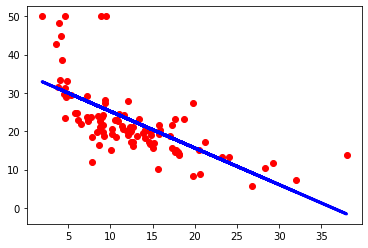

In [96]:
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, predict, color='blue', linewidth=3)
plt.show()

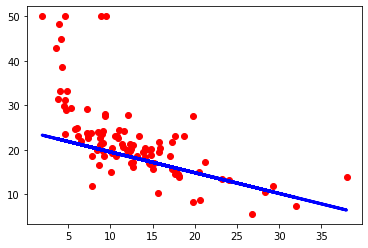

In [97]:
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, predictCRIM, color='blue', linewidth=3)
plt.show()

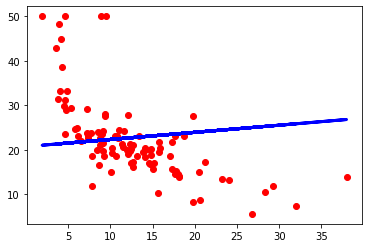

In [98]:
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, predictZN, color='blue', linewidth=3)
plt.show()

In [99]:
modelLSTAT.intercept_

34.76519272372788

In [100]:
modelCRIM.intercept_

24.192439742748128

In [101]:
modelZN.intercept_

20.722570989350256

In [102]:
#Model na 3 najlepsze zmienne objaśniajace
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['LSTAT','CRIM','ZN']], df.Y, test_size=0.3, random_state=0)

In [104]:
modelB3 = LinearRegression()

modelB3.fit(X_train, y_train)

modelB3.score(X_test, y_test)

0.5206645652964168

In [105]:
modelB3.coef_

array([-0.8792987 , -0.08341314,  0.03179165])

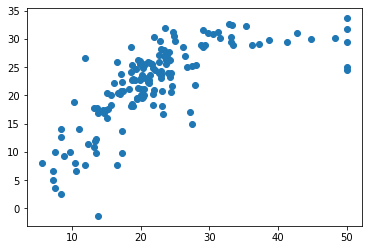

In [106]:
predyktB3 = modelB3.predict(X_test)
plt.scatter(y_test, predyktB3)
plt.show()